## 딥러닝의 여러 알고리즘

In [1]:
''' 1. module import'''
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms, datasets

In [2]:
''' 2. 딥러닝 모델을설계할 때 활용하는 장비 확인'''
if torch.cuda.is_available():
    DEVICE = torch.device('cuda')
else:
    DEVICE = torch.device('cpu')
    
print('Using PyTorch version:', torch.__version__, 'Device:', DEVICE)

Using PyTorch version: 1.4.0 Device: cuda


In [24]:
BATCH_SIZE = 32
EPOCHS = 10

''' 3. MNIST 데이터 다운로드(train, test set 분리)'''
train_dataset = datasets.MNIST(root = '../data/MNIST',
                              train=True,
                              download=True,
                              transform = transforms.ToTensor())
test_dataset = datasets.MNIST(root = '../data/MNIST',
                              train=False,
                              transform = transforms.ToTensor())
train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                          batch_size = BATCH_SIZE,
                                          shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset = test_dataset,
                                          batch_size = BATCH_SIZE,
                                          shuffle=False)

In [25]:
''' 4. 데이터 확인(1)'''
for (x_train, y_train) in train_loader:
    print('x_train:', x_train.size(), 'type:', x_train.type())
    print('y_train:', y_train.size(), 'type:', y_train.type())
    break

x_train: torch.Size([32, 1, 28, 28]) type: torch.FloatTensor
y_train: torch.Size([32]) type: torch.LongTensor


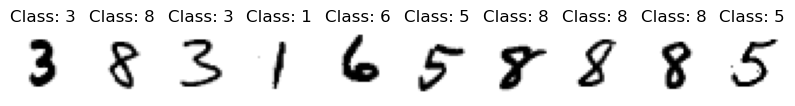

In [26]:
''' 5. 데이터 확인(2)'''
pltsize = 1
plt.figure(figsize=(10 * pltsize, pltsize))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.axis('off')
    plt.imshow(x_train[i,:,:,:].numpy().reshape(28,28), cmap='gray_r')
    plt.title('Class: ' + str(y_train[i].item()))

## 3-1.Dropout

In [28]:
''' 6. MLP모델 설계-drop out 설정'''
class Net(nn.Module): #nn.Module클래스를 상속받는 Net클래스 정의
    def __init__(self): #Net인스턴스 생성했을 대 지니게 되는 성질 정의
        super(Net, self).__init__() #nn.Module내에 있는 메스드 상속받아 이용
        self.fc1 = nn.Linear(28 * 28, 512) #첫번째 fully connected layer 정의
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)
        self.dropout_prob = 0.5
        
        #Net클래스를 이용해 설계한 MLP모델의 forward propagation 정의
        #설계한 MLP모델에 데이터를 입력했을 때 output계산하기까지의 과정 나열
    def forward(self, x): 
        # MLP모델은 1차원의 벡터 값을 입력으로 받을 수 있다. 그러나 MNIST 이미지데이터는 2차원.
        # 2차원->1차원 => view메서드 이용해여 784크기의 1차원 데이터로 변환해 진행
        # 2차원의 데이터를 1차원으로 펼친다. flatten
        x = x.view(-1,28*28) 
        
        # __init__의 첫번째 fully connected layer에 1차원으로 펼친 이미지 데이터 통과
        x = self.fc1(x)
        
        # 두번째 fully connected layer의 input으로 계산.
        x = F.sigmoid(x)
        x = F.dropout(x, training = self.training, p = self.dropout_prob)
        # 두번째 fully connected layer에서 sigmoid함수를 이용해 계산 된 결괏값 통과
        x = self.fc2(x)
        
        # 세번째 fully connected layer의 input
        x = F.sigmoid(x)
        x = F.dropout(x, training = self.training, p = self.dropout_prob)
        # 세번째 fully connected layer에서 sigmoid함수를 이용해 계산 된 결괏값 통과
        x = self.fc3(x)
        
        # 최종 output계산. 0~9까지 총 10가지 중 하나로 분류 => softmax를 이용해 확률 값 계산
        # softmax가 아닌 log_softmax 사용한 이유:역전파 진행할때 loss에 대한 gradient값을 원할하게 계산가능.
        # 로그함수의 기울기는 부드럽게 변화
        x = F.log_softmax(x, dim=1)
        
        # 최종 계산된 x값을 output으로 반환
        return x

## 3-2.Dropout+ReLU

In [29]:
''' 6. MLP모델 설계'''
class Net(nn.Module): #nn.Module클래스를 상속받는 Net클래스 정의
    def __init__(self): #Net인스턴스 생성했을 대 지니게 되는 성질 정의
        super(Net, self).__init__() #nn.Module내에 있는 메스드 상속받아 이용
        self.fc1 = nn.Linear(28 * 28, 512) #첫번째 fully connected layer 정의
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)
        self.dropout_prob = 0.5
        
        #Net클래스를 이용해 설계한 MLP모델의 forward propagation 정의
        #설계한 MLP모델에 데이터를 입력했을 때 output계산하기까지의 과정 나열
    def forward(self, x): 
        # MLP모델은 1차원의 벡터 값을 입력으로 받을 수 있다. 그러나 MNIST 이미지데이터는 2차원.
        # 2차원->1차원 => view메서드 이용해여 784크기의 1차원 데이터로 변환해 진행
        # 2차원의 데이터를 1차원으로 펼친다. flatten
        x = x.view(-1,28*28) 
        
        # __init__의 첫번째 fully connected layer에 1차원으로 펼친 이미지 데이터 통과
        x = self.fc1(x)
        x = F.relu(x)
        x = F.dropout(x, training = self.training, p = self.dropout_prob)
        x = self.fc2(x)
        
        # 세번째 fully connected layer의 input
        x = F.relu(x)
        x = F.dropout(x, training = self.training, p = self.dropout_prob)
        x = self.fc3(x)
        
        # 최종 output계산. 0~9까지 총 10가지 중 하나로 분류 => softmax를 이용해 확률 값 계산
        # softmax가 아닌 log_softmax 사용한 이유:역전파 진행할때 loss에 대한 gradient값을 원할하게 계산가능.
        # 로그함수의 기울기는 부드럽게 변화
        x = F.log_softmax(x, dim=1)
        
        # 최종 계산된 x값을 output으로 반환
        return x

## 3-3. Dropout + ReLU + Batch normalization

In [40]:
''' 6. MLP모델 설계'''
class Net(nn.Module): #nn.Module클래스를 상속받는 Net클래스 정의
    def __init__(self): #Net인스턴스 생성했을 대 지니게 되는 성질 정의
        super(Net, self).__init__() #nn.Module내에 있는 메스드 상속받아 이용
        self.fc1 = nn.Linear(28 * 28, 512) #첫번째 fully connected layer 정의
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)
        self.dropout_prob = 0.5
        self.batch_norm1 = nn.BatchNorm1d(512)
        self.batch_norm2 = nn.BatchNorm1d(256)
        
        #Net클래스를 이용해 설계한 MLP모델의 forward propagation 정의
        #설계한 MLP모델에 데이터를 입력했을 때 output계산하기까지의 과정 나열
    def forward(self, x): 
        # MLP모델은 1차원의 벡터 값을 입력으로 받을 수 있다. 그러나 MNIST 이미지데이터는 2차원.
        # 2차원->1차원 => view메서드 이용해여 784크기의 1차원 데이터로 변환해 진행
        # 2차원의 데이터를 1차원으로 펼친다. flatten
        x = x.view(-1,28*28) 
        
        # __init__의 첫번째 fully connected layer에 1차원으로 펼친 이미지 데이터 통과
        x = self.fc1(x)
        x = self.batch_norm1(x)
        
        # 두번째 fully connected layer의 input으로 계산.
        x = F.relu(x)
        x = F.dropout(x, training = self.training, p = self.dropout_prob)
        x = self.fc2(x)
        x = self.batch_norm2(x)
        # 세번째 fully connected layer의 input
        x = F.relu(x)
        x = F.dropout(x, training = self.training, p = self.dropout_prob)
        x = self.fc3(x)
        x = F.log_softmax(x, dim=1)
        
        return x

In [38]:
''' 7. Optimizer, Object Function 설정'''
model = Net().to(DEVICE)
# 역전파를 이용해 파라미터를 업데이터 할 대 이용하는 optimizer를 정의
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.5)
criterion = nn.CrossEntropyLoss()

print(model)

Net(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=10, bias=True)
  (batch_norm1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batch_norm2): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


## 3-4. Dropout + ReLU + Batch normalization + He Uniform Initialization
He Uniform Initialization : Xavier Initialization은 ReLI함수를 사용할때 비효율적이라는 점을 보완한 초기화 기법
## 3-5. Dropout + ReLU + Batch normalization + He Uniform Initialization + Adam(optimizer)

In [45]:
''' 7. Optimizer, Object Function 설정'''
# weight, bias 등 딥러닝 모델에서 초깃값으로 설정되는 요소에 대한 모듈인 init를 임포트
import torch.nn.init as init

# MLP모델 내의 weight를 초기화할 부분 설정
def weight_init(m):
    # MLP모델을 구성하고 있는 파라미터 중 nn.Linear에 해당하는 파라미터 값에 대해서만 지정
    if isinstance(m, nn.Linear): # m이 nn.Linear형인지
        init.kaiming_uniform_(m.weight.data) #kaiming_uniform_ : He Initialization
        
model = Net().to(DEVICE)
model.apply(weight_init)
# 역전파를 이용해 파라미터를 업데이터 할 대 이용하는 optimizer를 정의
#optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.5)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()

In [46]:
''' 8. MLP모델 학습을 진행하며 학습 데이터에 대한 모델 성능을 확인하는 함수 정의'''
def train(model, train_loader, optimizer, log_interval):
    model.train()
    #trian_loader에는 학습에 이용되는 이미지 데이터와 레이블 데이터가 미니배치 단위로 묶여 저장되어있음.
    #train_loader내에 mini-batch단위로 저장된 데이터를 순서대로 이용해 MLP모형에 학습
    for batch_idx,(image, label) in enumerate(train_loader):
        # print(batch_idx) : 200
        #미니배치 내에 있는 이미지 데이터와 매칭된 레이블 데이터도 MLP모델을 학습시키기 위해 기존에 정의한 장비에 할당
        image = image.to(DEVICE)
        label = label.to(DEVICE)
        
        # 과거에 이용한 미니배치 내에 있는 이미지데이터와 레이블데이터를 바탕으로 계산된 Loss의 Gradient값이 optimizer에 할당돼 있으므로 
        # optimizer의 gradient를 초기화
        optimizer.zero_grad()
        output = model(image)
        
        #계산된 output과 장비에 할당된 레이블 데이터를 기존에 정의한 cross entropy를 이용해 loss값 계산
        loss = criterion(output,label)
        
        #loss값을 계산한 결과를 바탕으로 역전파를 이용해 계산된 gradient값을 각 파라미터에 할당
        loss.backward()
        
        #각 파라미터에 할당된 gradient값을 이용해 파라미터값 업데이트
        optimizer.step()
        
        if batch_idx % log_interval == 0:
            print("Train Epoch: {} [{}/{}({:.0f}%)]\tTrain Loss: {:.6f}".format(
            Epoch, batch_idx*len(image),
            len(train_loader.dataset), 100.*batch_idx/len(train_loader), loss.item()))

In [47]:
''' 9. 학습되는 과정 속에서 검증 데이터에 대한 모델 성능을 확인하는 함수 정의'''
def evaluate(model, test_loader):
    #학습 과정 또는 학습이 완료된 MLP모델을 학습 상태가 아닌, 평가 상태로 지정
    model.eval()
    
    #test_loader내의 데이터를 이용해 loss값을 계산하기 위해 test_loss를 0으로 임시설정
    test_loss = 0
    
    #학습 과정 또는 학습이 완료된 MLP모델이 올바른 class로 분류한 경우를 세기 위해 correct=0으로 임시 설정
    correct = 0
    
    #모델 평가단계에서 gradient를 통해 파라미터 값이 업데이트 되는 현상을 방지하기 위해 torch.no_grad()메서드 이용해 gradient흐름 억제
    with torch.no_grad():
        
        for image, label in test_loader:
            image = image.to(DEVICE)
            label = label.to(DEVICE)
            output = model(image)
            
            #기존에 정의한 crossentropy를 이용해 loss값을 계산한 결괏값을 test_loss에 더해 업데이트
            test_loss += criterion(output, label).item()
            
            #output값은 크기가 10인 벡터 값. 계산된 벡터 값 내 가장 큰 값인 위치에 대해 해당 위치에 대응하는 클래스로 예측했다고 판단.
            prediction = output.max(1, keepdim = True)[1]
            
            #모델이 최종으로 예측한 클래스의 값(prediction)과 실제 레이블(label)이 의미하는 클래스가 맞으면 correct에 더해 올바르게 예측한 횟수 저장
            correct += prediction.eq(label.view_as(prediction)).sum().item()
            
    #현재까지 계산된 test_loss값을 test_loader내에 존재하는 미니배치 개수만큼 나눠 평균 loss값으로 계산
    test_loss /= len(test_loader.dataset)
    
    #test_loader데이터 중 얼마나 맞췄는지를 계산해 정확도를 계산
    test_accuracy = 100. * correct / len(test_loader.dataset) #len(test_loader.dataset):10000
    return test_loss, test_accuracy

## 3-1.epochs=10, sigmoid+dropout

In [10]:
''' 10. MLP학습을 실행하면서 trian, test set의 loss 및 test set accuracy를 확인'''
for Epoch in range(1, EPOCHS+1):
    train(model, train_loader, optimizer, log_interval=200)
    test_loss, test_accuracy = evaluate(model, test_loader)
    print("\n[EPOCH:{}], \tTest Loss: {:.4f}, \tTest Accuracy: {:.2f} %\n".format(
    Epoch, test_loss, test_accuracy))

C:\Users\leeej\anaconda3\envs\practice\lib\site-packages\torch\nn\functional.py:1351: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Train Epoch: 1 [0/60000(0%)]	Train Loss: 2.393649
Train Epoch: 1 [6400/60000(11%)]	Train Loss: 2.459405
Train Epoch: 1 [12800/60000(21%)]	Train Loss: 2.362060
Train Epoch: 1 [19200/60000(32%)]	Train Loss: 2.283095
Train Epoch: 1 [25600/60000(43%)]	Train Loss: 2.360279
Train Epoch: 1 [32000/60000(53%)]	Train Loss: 2.396481
Train Epoch: 1 [38400/60000(64%)]	Train Loss: 2.304133
Train Epoch: 1 [44800/60000(75%)]	Train Loss: 2.281083
Train Epoch: 1 [51200/60000(85%)]	Train Loss: 2.314523
Train Epoch: 1 [57600/60000(96%)]	Train Loss: 2.241969

[EPOCH:1], 	Test Loss: 0.0713, 	Test Accuracy: 15.02 %

Train Epoch: 2 [0/60000(0%)]	Train Loss: 2.291219
Train Epoch: 2 [6400/60000(11%)]	Train Loss: 2.293644
Train Epoch: 2 [12800/60000(21%)]	Train Loss: 2.259175
Train Epoch: 2 [19200/60000(32%)]	Train Loss: 2.260362
Train Epoch: 2 [25600/60000(43%)]	Train Loss: 2.249936
Train Epoch: 2 [32000/60000(53%)]	Train Loss: 2.311914
Train Epoch: 2 [38400/60000(64%)]	Train Loss: 2.074335
Train Epoch: 2 [4480

## 3-1.epochs=30, sigmoid+dropout

In [18]:
''' 10. MLP학습을 실행하면서 trian, test set의 loss 및 test set accuracy를 확인'''
for Epoch in range(1, EPOCHS+1):
    train(model, train_loader, optimizer, log_interval=200)
    test_loss, test_accuracy = evaluate(model, test_loader)
    print("\n[EPOCH:{}], \tTest Loss: {:.4f}, \tTest Accuracy: {:.2f} %\n".format(
    Epoch, test_loss, test_accuracy))

Train Epoch: 1 [0/60000(0%)]	Train Loss: 2.435961
Train Epoch: 1 [6400/60000(11%)]	Train Loss: 2.406326
Train Epoch: 1 [12800/60000(21%)]	Train Loss: 2.338543
Train Epoch: 1 [19200/60000(32%)]	Train Loss: 2.320160
Train Epoch: 1 [25600/60000(43%)]	Train Loss: 2.287632
Train Epoch: 1 [32000/60000(53%)]	Train Loss: 2.327087
Train Epoch: 1 [38400/60000(64%)]	Train Loss: 2.343685
Train Epoch: 1 [44800/60000(75%)]	Train Loss: 2.285419
Train Epoch: 1 [51200/60000(85%)]	Train Loss: 2.303885
Train Epoch: 1 [57600/60000(96%)]	Train Loss: 2.290537

[EPOCH:1], 	Test Loss: 0.0713, 	Test Accuracy: 10.09 %

Train Epoch: 2 [0/60000(0%)]	Train Loss: 2.303993
Train Epoch: 2 [6400/60000(11%)]	Train Loss: 2.235222
Train Epoch: 2 [12800/60000(21%)]	Train Loss: 2.310011
Train Epoch: 2 [19200/60000(32%)]	Train Loss: 2.218569
Train Epoch: 2 [25600/60000(43%)]	Train Loss: 2.242838
Train Epoch: 2 [32000/60000(53%)]	Train Loss: 2.285932
Train Epoch: 2 [38400/60000(64%)]	Train Loss: 2.281090
Train Epoch: 2 [4480

Train Epoch: 14 [44800/60000(75%)]	Train Loss: 0.698491
Train Epoch: 14 [51200/60000(85%)]	Train Loss: 0.367450
Train Epoch: 14 [57600/60000(96%)]	Train Loss: 0.269219

[EPOCH:14], 	Test Loss: 0.0117, 	Test Accuracy: 88.87 %

Train Epoch: 15 [0/60000(0%)]	Train Loss: 0.393330
Train Epoch: 15 [6400/60000(11%)]	Train Loss: 0.731158
Train Epoch: 15 [12800/60000(21%)]	Train Loss: 0.869909
Train Epoch: 15 [19200/60000(32%)]	Train Loss: 0.526210
Train Epoch: 15 [25600/60000(43%)]	Train Loss: 0.384606
Train Epoch: 15 [32000/60000(53%)]	Train Loss: 0.338612
Train Epoch: 15 [38400/60000(64%)]	Train Loss: 0.543727
Train Epoch: 15 [44800/60000(75%)]	Train Loss: 0.610306
Train Epoch: 15 [51200/60000(85%)]	Train Loss: 0.734767
Train Epoch: 15 [57600/60000(96%)]	Train Loss: 0.753845

[EPOCH:15], 	Test Loss: 0.0114, 	Test Accuracy: 89.00 %

Train Epoch: 16 [0/60000(0%)]	Train Loss: 0.711632
Train Epoch: 16 [6400/60000(11%)]	Train Loss: 0.420075
Train Epoch: 16 [12800/60000(21%)]	Train Loss: 0.304257


Train Epoch: 28 [6400/60000(11%)]	Train Loss: 0.352260
Train Epoch: 28 [12800/60000(21%)]	Train Loss: 0.604008
Train Epoch: 28 [19200/60000(32%)]	Train Loss: 0.327361
Train Epoch: 28 [25600/60000(43%)]	Train Loss: 0.490036
Train Epoch: 28 [32000/60000(53%)]	Train Loss: 0.312949
Train Epoch: 28 [38400/60000(64%)]	Train Loss: 0.439034
Train Epoch: 28 [44800/60000(75%)]	Train Loss: 0.441333
Train Epoch: 28 [51200/60000(85%)]	Train Loss: 0.322650
Train Epoch: 28 [57600/60000(96%)]	Train Loss: 0.276841

[EPOCH:28], 	Test Loss: 0.0087, 	Test Accuracy: 91.54 %

Train Epoch: 29 [0/60000(0%)]	Train Loss: 0.451981
Train Epoch: 29 [6400/60000(11%)]	Train Loss: 0.240538
Train Epoch: 29 [12800/60000(21%)]	Train Loss: 0.269989
Train Epoch: 29 [19200/60000(32%)]	Train Loss: 0.590693
Train Epoch: 29 [25600/60000(43%)]	Train Loss: 0.609357
Train Epoch: 29 [32000/60000(53%)]	Train Loss: 0.262110
Train Epoch: 29 [38400/60000(64%)]	Train Loss: 0.373997
Train Epoch: 29 [44800/60000(75%)]	Train Loss: 0.3278

## 3-2.epochs=10, relu+dropout

In [32]:
''' 10. MLP학습을 실행하면서 trian, test set의 loss 및 test set accuracy를 확인'''
for Epoch in range(1, EPOCHS+1):
    train(model, train_loader, optimizer, log_interval=200)
    test_loss, test_accuracy = evaluate(model, test_loader)
    print("\n[EPOCH:{}], \tTest Loss: {:.4f}, \tTest Accuracy: {:.2f} %\n".format(
    Epoch, test_loss, test_accuracy))

Train Epoch: 1 [0/60000(0%)]	Train Loss: 2.318203
Train Epoch: 1 [6400/60000(11%)]	Train Loss: 2.038199
Train Epoch: 1 [12800/60000(21%)]	Train Loss: 1.214384
Train Epoch: 1 [19200/60000(32%)]	Train Loss: 0.598691
Train Epoch: 1 [25600/60000(43%)]	Train Loss: 0.627240
Train Epoch: 1 [32000/60000(53%)]	Train Loss: 0.372438
Train Epoch: 1 [38400/60000(64%)]	Train Loss: 0.457532
Train Epoch: 1 [44800/60000(75%)]	Train Loss: 0.731041
Train Epoch: 1 [51200/60000(85%)]	Train Loss: 0.497152
Train Epoch: 1 [57600/60000(96%)]	Train Loss: 0.412464

[EPOCH:1], 	Test Loss: 0.0100, 	Test Accuracy: 91.01 %

Train Epoch: 2 [0/60000(0%)]	Train Loss: 0.402511
Train Epoch: 2 [6400/60000(11%)]	Train Loss: 0.300515
Train Epoch: 2 [12800/60000(21%)]	Train Loss: 0.510545
Train Epoch: 2 [19200/60000(32%)]	Train Loss: 0.244224
Train Epoch: 2 [25600/60000(43%)]	Train Loss: 0.399617
Train Epoch: 2 [32000/60000(53%)]	Train Loss: 0.340749
Train Epoch: 2 [38400/60000(64%)]	Train Loss: 0.320061
Train Epoch: 2 [4480

## 3-3. epochs=10, Dropout + ReLU + Batch normalization

In [37]:
''' 10. MLP학습을 실행하면서 trian, test set의 loss 및 test set accuracy를 확인'''
for Epoch in range(1, EPOCHS+1):
    train(model, train_loader, optimizer, log_interval=200)
    test_loss, test_accuracy = evaluate(model, test_loader)
    print("\n[EPOCH:{}], \tTest Loss: {:.4f}, \tTest Accuracy: {:.2f} %\n".format(
    Epoch, test_loss, test_accuracy))

Train Epoch: 1 [0/60000(0%)]	Train Loss: 2.491906
Train Epoch: 1 [6400/60000(11%)]	Train Loss: 0.480169
Train Epoch: 1 [12800/60000(21%)]	Train Loss: 0.403541
Train Epoch: 1 [19200/60000(32%)]	Train Loss: 0.488333
Train Epoch: 1 [25600/60000(43%)]	Train Loss: 0.536266
Train Epoch: 1 [32000/60000(53%)]	Train Loss: 0.348192
Train Epoch: 1 [38400/60000(64%)]	Train Loss: 0.124434
Train Epoch: 1 [44800/60000(75%)]	Train Loss: 0.300207
Train Epoch: 1 [51200/60000(85%)]	Train Loss: 0.304999
Train Epoch: 1 [57600/60000(96%)]	Train Loss: 0.119229

[EPOCH:1], 	Test Loss: 0.0048, 	Test Accuracy: 95.48 %

Train Epoch: 2 [0/60000(0%)]	Train Loss: 0.291372
Train Epoch: 2 [6400/60000(11%)]	Train Loss: 0.243482
Train Epoch: 2 [12800/60000(21%)]	Train Loss: 0.301401
Train Epoch: 2 [19200/60000(32%)]	Train Loss: 0.075179
Train Epoch: 2 [25600/60000(43%)]	Train Loss: 0.081466
Train Epoch: 2 [32000/60000(53%)]	Train Loss: 0.044149
Train Epoch: 2 [38400/60000(64%)]	Train Loss: 0.302465
Train Epoch: 2 [4480

## 3-4. Dropout + ReLU + Batch normalization + He Uniform Initialization

In [44]:
''' 10. MLP학습을 실행하면서 trian, test set의 loss 및 test set accuracy를 확인'''
for Epoch in range(1, EPOCHS+1):
    train(model, train_loader, optimizer, log_interval=200)
    test_loss, test_accuracy = evaluate(model, test_loader)
    print("\n[EPOCH:{}], \tTest Loss: {:.4f}, \tTest Accuracy: {:.2f} %\n".format(
    Epoch, test_loss, test_accuracy))

Train Epoch: 1 [0/60000(0%)]	Train Loss: 3.330101
Train Epoch: 1 [6400/60000(11%)]	Train Loss: 0.668033
Train Epoch: 1 [12800/60000(21%)]	Train Loss: 0.675462
Train Epoch: 1 [19200/60000(32%)]	Train Loss: 0.448291
Train Epoch: 1 [25600/60000(43%)]	Train Loss: 0.764537
Train Epoch: 1 [32000/60000(53%)]	Train Loss: 0.451630
Train Epoch: 1 [38400/60000(64%)]	Train Loss: 0.237209
Train Epoch: 1 [44800/60000(75%)]	Train Loss: 0.436398
Train Epoch: 1 [51200/60000(85%)]	Train Loss: 0.362564
Train Epoch: 1 [57600/60000(96%)]	Train Loss: 0.568494

[EPOCH:1], 	Test Loss: 0.0070, 	Test Accuracy: 93.39 %

Train Epoch: 2 [0/60000(0%)]	Train Loss: 0.595237
Train Epoch: 2 [6400/60000(11%)]	Train Loss: 0.298523
Train Epoch: 2 [12800/60000(21%)]	Train Loss: 0.498785
Train Epoch: 2 [19200/60000(32%)]	Train Loss: 0.215108
Train Epoch: 2 [25600/60000(43%)]	Train Loss: 0.321864
Train Epoch: 2 [32000/60000(53%)]	Train Loss: 0.327670
Train Epoch: 2 [38400/60000(64%)]	Train Loss: 0.271319
Train Epoch: 2 [4480

## 3-5. Dropout + ReLU + Batch normalization + He Uniform Initialization + Adam

In [48]:
''' 10. MLP학습을 실행하면서 trian, test set의 loss 및 test set accuracy를 확인'''
for Epoch in range(1, EPOCHS+1):
    train(model, train_loader, optimizer, log_interval=200)
    test_loss, test_accuracy = evaluate(model, test_loader)
    print("\n[EPOCH:{}], \tTest Loss: {:.4f}, \tTest Accuracy: {:.2f} %\n".format(
    Epoch, test_loss, test_accuracy))

Train Epoch: 1 [0/60000(0%)]	Train Loss: 3.314788
Train Epoch: 1 [6400/60000(11%)]	Train Loss: 0.183814
Train Epoch: 1 [12800/60000(21%)]	Train Loss: 0.214900
Train Epoch: 1 [19200/60000(32%)]	Train Loss: 0.260503
Train Epoch: 1 [25600/60000(43%)]	Train Loss: 0.644800
Train Epoch: 1 [32000/60000(53%)]	Train Loss: 0.249400
Train Epoch: 1 [38400/60000(64%)]	Train Loss: 0.475859
Train Epoch: 1 [44800/60000(75%)]	Train Loss: 0.222512
Train Epoch: 1 [51200/60000(85%)]	Train Loss: 0.341864
Train Epoch: 1 [57600/60000(96%)]	Train Loss: 0.271582

[EPOCH:1], 	Test Loss: 0.0041, 	Test Accuracy: 96.05 %

Train Epoch: 2 [0/60000(0%)]	Train Loss: 0.112106
Train Epoch: 2 [6400/60000(11%)]	Train Loss: 0.505707
Train Epoch: 2 [12800/60000(21%)]	Train Loss: 0.093931
Train Epoch: 2 [19200/60000(32%)]	Train Loss: 0.711520
Train Epoch: 2 [25600/60000(43%)]	Train Loss: 0.179438
Train Epoch: 2 [32000/60000(53%)]	Train Loss: 0.280567
Train Epoch: 2 [38400/60000(64%)]	Train Loss: 0.236296
Train Epoch: 2 [4480

In [60]:
import sys
sys.version

'3.7.16 (default, Jan 17 2023, 16:06:28) [MSC v.1916 64 bit (AMD64)]'